[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial1.ipynb)   <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial1.ipynb" target="_blank"><img alt="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>

# **Tutorial 1: Creating DataArrays and Datasets to Assess Global Climate Data**


**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Yosmely Bermúdez, Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Chi Zhang, Ohad Zivan 

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan 

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google deepmind

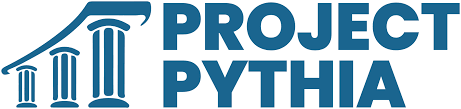 | 
-
Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851



# **Tutorial Objectives**


As you just learned in the Introduction to Climate video, variations in global climate involve various forcings, feedbacks, and interactions between multiple processes and systems. Because of this complexity, global climate datasets are often very large with multiple dimensions and variables.

One useful computational tool for organizing, analyzing and interpreting large global datasets is [Xarray](https://xarray.pydata.org/en/v2023.05.0/getting-started-guide/why-xarray.html), an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient.

In this first tutorial, we will use the `DataArray` and `Dataset` objects, which are used to represent and manipulate spatial data, to practice organizing large global climate datasets and to understand variations in Earth's climate system.

# **Setup**

Similar to `numpy`, `np`; `pandas`, `pd`; you may often encounter `xarray` imported within a shortened namespace as `xr`.

In [ ]:
# imports
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

##  Figure Settings


###  Figure Settings


####  Figure Settings


#####  Figure Settings


In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

##  Video 1: Video Title


###  Video 1: Video Title


####  Video 1: Video Title


#####  Video 1: Video Title


In [ ]:
# @title Video 1: Video Title
#Tech team will add code to format and display the video

# Introducing the `DataArray` and `Dataset`

[Xarray](https://xarray.pydata.org/en/v2023.05.0/getting-started-guide/why-xarray.html) expands on the capabilities on [NumPy](https://numpy.org/doc/stable/user/index.html#user) arrays, providing a lot of streamlined data manipulation. It is similar in that respect to [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide), but whereas Pandas excels at working with tabular data, Xarray is focused on N-dimensional arrays of data (i.e. grids). Its interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces to provide functionality similar to netCDF-java's [Common Data Model (CDM)](https://docs.unidata.ucar.edu/netcdf-java/current/userguide/common_data_model_overview.html). 

# **Section 1: Creation of a `DataArray` Object**

The `DataArray` is one of the basic building blocks of Xarray (see docs [here](http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataarray)). It provides a `numpy.ndarray`-like object that expands to provide two critical pieces of functionality:

1. Coordinate names and values are stored with the data, making slicing and indexing much more powerful
2. It has a built-in container for attributes

Here we'll initialize a `DataArray` object by wrapping a plain NumPy array, and explore a few of its properties.

## **Section 1.1: Generate a Random Numpy Array**

For our first example, we'll just create a random array of "temperature" data in units of Kelvin:

In [ ]:
rand_data = 283 + 5 * np.random.randn(5, 3, 4)
rand_data

## **Section 1.2: Wrap the Array: First Attempt**

Now we create a basic `DataArray` just by passing our plain `data` as an input:

In [ ]:
temperature = xr.DataArray(rand_data)
temperature

Note two things:

1. Xarray generates some basic dimension names for us (`dim_0`, `dim_1`, `dim_2`). We'll improve this with better names in the next example.
2. Wrapping the numpy array in a `DataArray` gives us a rich display in the notebook! (Try clicking the array symbol to expand or collapse the view)

## **Section 1.3: Assign Dimension Names**

Much of the power of Xarray comes from making use of named dimensions. So let's add some more useful names! We can do that by passing an ordered list of names using the keyword argument `dims`:

In [ ]:
temperature = xr.DataArray(rand_data, dims=['time', 'lat', 'lon'])
temperature

This is already an improvement over a NumPy array because we have names for each of the dimensions (or axes). Even better, we can associate arrays representing the values for the coordinates for each of these dimensions with the data when we create the `DataArray`. We'll see this in the next example.

# **Section 2: Create a `DataArray` with Named Coordinates**

## **Section 2.1: Make Time and Space Coordinates**

Here we will use [Pandas](https://foundations.projectpythia.org/core/pandas.html) to create an array of [datetime data](https://foundations.projectpythia.org/core/datetime.html), which we will then use to create a `DataArray` with a named coordinate `time`.

In [ ]:
times_index = pd.date_range('2018-01-01', periods=5)
times_index

We'll also create arrays to represent sample longitude and latitude:

In [ ]:
lons = np.linspace(-120, -60, 4)
lats = np.linspace(25, 55, 3)

### **Section 2.1.1: Initialize the `DataArray` with Complete Coordinate Info**

When we create the `DataArray` instance, we pass in the arrays we just created:

In [ ]:
temperature = xr.DataArray(rand_data, coords=[times_index, lats, lons], dims=['time', 'lat', 'lon'])
temperature

### **Section 2.1.2: Set Useful Attributes**

We can also set some attribute metadata, which will help provide clear descriptions of the data. In this case, we can specify that we're looking at 'air_temperature' data and the units are 'kelvin'.

In [ ]:
temperature.attrs['units'] = 'kelvin'
temperature.attrs['standard_name'] = 'air_temperature'

temperature

### **Section 2.1.3: Attributes Are Not Preserved by Default!**

Notice what happens if we perform a mathematical operaton with the `DataArray`: the coordinate values persist, but the attributes are lost. This is done because it is very challenging to know if the attribute metadata is still correct or appropriate after arbitrary arithmetic operations.

To illustrate this, we'll do a simple unit conversion from Kelvin to Celsius:

In [ ]:
temperature_in_celsius = temperature - 273.15
temperature_in_celsius

We usually wish to keep metadata with our dataset, even after manipulating the data. For example it can tell us what the units are of a variable of interest. So when you perform operations on your data, make sure to check that all the information you want is carried over. If it isn't, you can add it back in following the instructions in the section before this. For an in-depth discussion of how Xarray handles metadata, you can find more information in the Xarray documents [here](http://xarray.pydata.org/en/stable/getting-started-guide/faq.html#approach-to-metadata).

# **Section 3: The `Dataset`: a Container for `DataArray`s with Shared Coordinates**

Along with `DataArray`, the other key object type in Xarray is the `Dataset`, which is a dictionary-like container that holds one or more `DataArray`s, which can also optionally share coordinates (see docs [here](http://xarray.pydata.org/en/stable/user-guide/data-structures.html#dataset)).

The most common way to create a `Dataset` object is to load data from a file (which we will practice in a later tutorial). Here, instead, we will create another `DataArray` and combine it with our `temperature` data.

This will illustrate how the information about common coordinate axes is used.

## **Section 3.1: Create a Pressure `DataArray` Using the Same Coordinates**

For our next `DataArry` example, we'll create a random array of `pressure` data in units of hectopascal (hPa). This code mirrors how we created the `temperature` object above.

In [ ]:
pressure_data = 1000.0 + 5 * np.random.randn(5, 3, 4)
pressure = xr.DataArray(
    pressure_data, coords=[times_index, lats, lons], dims=['time', 'lat', 'lon']
)
pressure.attrs['units'] = 'hPa'
pressure.attrs['standard_name'] = 'air_pressure'

pressure

## **Section 3.2: Create a `Dataset` Object**

Each `DataArray` in our `Dataset` needs a name! 

The most straightforward way to create a `Dataset` with our `temperature` and `pressure` arrays is to pass a dictionary using the keyword argument `data_vars`:

In [ ]:
ds = xr.Dataset(data_vars={'Temperature': temperature, 'Pressure': pressure})
ds

Notice that the `Dataset` object `ds` is aware that both data arrays sit on the same coordinate axes.

## **Section 3.3: Access Data Variables and Coordinates in a `Dataset`**

We can pull out any of the individual `DataArray` objects in a few different ways.

Using the "dot" notation:

In [ ]:
ds.Pressure

... or using dictionary access like this:

In [ ]:
ds['Pressure']

We'll return to the `Dataset` object when we start loading data from files in later tutorials today.

# **Summary**

In this initial tutorial, the `DataArray` and `Dataset` objects were utilized to create and explore synthetic examples of climate data.

# **Resources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/xarray-intro.html).